In [1]:
## Exercise 1

#You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

##1. Load the dataset ../data/housing-data.csv
##- plot the histograms for each feature
##- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
##- create a linear regression model in Keras with the appropriate number of inputs and output##
##- split the data into train and test with a 20% test size
##- train the model on the training set and check its accuracy on training and test set
##- how's your model doing? Is the loss growing smaller?
##- try to improve your model with these experiments:
##   - normalize the input features with one of the rescaling techniques mentioned above
##    - use a different value for the learning rate of your model
##    - use a different optimizer
##- once you're satisfied with training, check the R2score on the test set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
df = pd.read_csv('data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


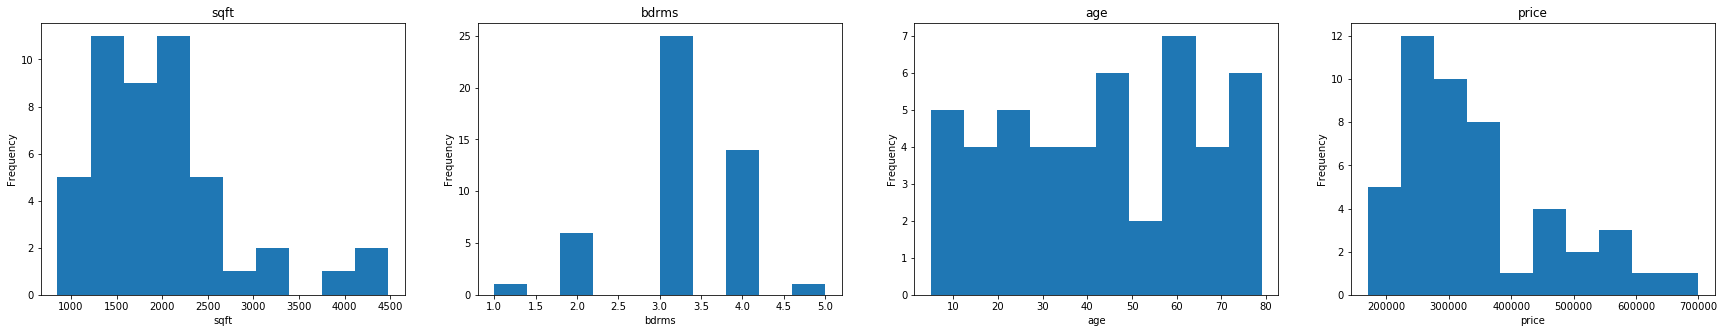

In [4]:
plt.figure(figsize=(30,5))

for i, feature in enumerate(df.columns):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title= feature)
    plt.xlabel(feature)

In [5]:
X = df[['sqft' , 'bdrms', 'age']].values
y = df['price'].values

In [6]:
X.shape

(47, 3)

In [7]:
y.shape

(47,)

In [8]:
df['sqft1000'] = df['sqft'] / 1000
df['age10'] = df['age'] / 10
df['price100k'] = df['price'] / 100000

In [9]:
X = df[['sqft1000' , 'bdrms', 'age10']].values
y = df['price100k'].values

In [10]:
X

array([[ 2.104,  3.   ,  7.   ],
       [ 1.6  ,  3.   ,  2.8  ],
       [ 2.4  ,  3.   ,  4.4  ],
       [ 1.416,  2.   ,  4.9  ],
       [ 3.   ,  4.   ,  7.5  ],
       [ 1.985,  4.   ,  6.1  ],
       [ 1.534,  3.   ,  1.2  ],
       [ 1.427,  3.   ,  5.7  ],
       [ 1.38 ,  3.   ,  1.4  ],
       [ 1.494,  3.   ,  1.5  ],
       [ 1.94 ,  4.   ,  0.7  ],
       [ 2.   ,  3.   ,  2.7  ],
       [ 1.89 ,  3.   ,  4.5  ],
       [ 4.478,  5.   ,  4.9  ],
       [ 1.268,  3.   ,  5.8  ],
       [ 2.3  ,  4.   ,  7.7  ],
       [ 1.32 ,  2.   ,  6.2  ],
       [ 1.236,  3.   ,  7.8  ],
       [ 2.609,  4.   ,  0.5  ],
       [ 3.031,  4.   ,  2.1  ],
       [ 1.767,  3.   ,  4.4  ],
       [ 1.888,  2.   ,  7.9  ],
       [ 1.604,  3.   ,  1.3  ],
       [ 1.962,  4.   ,  5.3  ],
       [ 3.89 ,  3.   ,  3.6  ],
       [ 1.1  ,  3.   ,  6.   ],
       [ 1.458,  3.   ,  2.9  ],
       [ 2.526,  3.   ,  1.3  ],
       [ 2.2  ,  3.   ,  2.8  ],
       [ 2.637,  3.   ,  2.5  ],
       [ 1

In [11]:
y

array([ 3.999  ,  3.299  ,  3.69   ,  2.32   ,  5.399  ,  2.999  ,
        3.149  ,  1.98999,  2.12   ,  2.425  ,  2.39999,  3.47   ,
        3.29999,  6.999  ,  2.599  ,  4.499  ,  2.999  ,  1.999  ,
        4.99998,  5.99   ,  2.529  ,  2.55   ,  2.429  ,  2.599  ,
        5.739  ,  2.499  ,  4.645  ,  4.69   ,  4.75   ,  2.999  ,
        3.499  ,  1.699  ,  3.149  ,  5.799  ,  2.859  ,  2.499  ,
        2.299  ,  3.45   ,  5.49   ,  2.87   ,  3.685  ,  3.299  ,
        3.14   ,  2.99   ,  1.799  ,  2.999  ,  2.395  ])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [22]:
X_train, X_test, y_train , y_test = train_test_split(X, y ,test_size=0.2)
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.9),'mean_squared_error')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
37/37 [==============================] - 0s - loss: 138.0911     
Epoch 2/100
37/37 [==============================] - 0s - loss: 26.4684     
Epoch 3/100
37/37 [==============================] - 0s - loss: 97.0572      
Epoch 4/100
37/37 [==============================] - 0s - loss: 21.1326     
Epoch 5/100
37/37 [==============================] - 0s - loss: 10.4250    
Epoch 6/100
37/37 [==============================] - 0s - loss: 34.1212     
Epoch 7/100
37/37 [==============================] - 0s - loss: 12.7581     
Epoch 8/100
37/37 [==============================] - 0s - loss: 3.8720     
Epoch 9/100
37/37 [==============================] - 0s - loss: 18.2627     
Epoch 10/100
37/37 [==============================] - 0s - loss: 9.7723      
Epoch 11/100
37/37 [==============================] - 0s - loss: 1.4037     
Epoch 12/100
37/37 [==============================] - 0s - loss: 8.4787     
Epoch 13/100
37/37 [==============================] - 0s - loss: 6.7258    

In [23]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("El porcentaje de predicciones en la sección de TRAIN es : \t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("El porcentaje de predicciones en la sección de TEST es : \t{:0.3f}".format(r2_score(y_test,y_test_pred)))

El porcentaje de predicciones en la sección de TRAIN es : 	0.629
El porcentaje de predicciones en la sección de TEST es : 	0.869


In [28]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
37/37 [==============================] - 0s - loss: 0.9922     
Epoch 2/100
37/37 [==============================] - 0s - loss: 1.4145     
Epoch 3/100
37/37 [==============================] - 0s - loss: 0.7521     
Epoch 4/100
37/37 [==============================] - 0s - loss: 0.5787     
Epoch 5/100
37/37 [==============================] - 0s - loss: 0.7622     
Epoch 6/100
37/37 [==============================] - 0s - loss: 1.0866     
Epoch 7/100
37/37 [==============================] - 0s - loss: 0.5427     
Epoch 8/100
37/37 [==============================] - 0s - loss: 0.5204     
Epoch 9/100
37/37 [==============================] - 0s - loss: 0.6915     
Epoch 10/100
37/37 [==============================] - 0s - loss: 0.5948     
Epoch 11/100
37/37 [==============================] - 0s - loss: 0.5497     
Epoch 12/100
37/37 [==============================] - 0s - loss: 0.6580     
Epoch 13/100
37/37 [==============================] - 0s - loss: 0.6785     
Epoch 14

In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The score in the training set is \t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("The score in the test is \t{:0.3f}".format(r2_score(y_test,y_test_pred)))

The score in the training set is 	0.614
The score in the test is 	0.823
